# Description
This notebook prepares a plot comparing the marginal posteriors of the initial biomass parameters.

In [1]:
import numpy
import arviz
from matplotlib import pyplot
import pathlib

import plotting

DP_PROCESSED = pathlib.Path("processed")

In [2]:
idata = arviz.from_netcdf(DP_PROCESSED / "full_posterior.nc")
posterior = idata.posterior.stack(sample=("chain", "draw"))
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Warmup iterations saved (warmup_*).

In [3]:
replicates = posterior.replicate.values
x0_medians = posterior.X0.median("sample")
order = numpy.argsort(x0_medians).values[::-1]
order = numpy.argsort([r[1:] + r[0] for r in replicates])
replicates = replicates[order]

In [4]:
# first: population mean prior
positions = [-1.8]
samples = [posterior.X0_mu.values]
labels = ["$\mathrm{X}_\mathrm{0, \mu}$"]

# next: well wise X0
positions += list(range(0, len(order)))
samples += [posterior.X0.sel(replicate=rid).values for rid in replicates]
labels += ["$\mathrm{X}_\mathrm{0, %s}$" % rid for rid in replicates]

assert len(positions) == len(samples) == len(labels)

In [5]:
def get_hdi_label(idata, param, label):
    µ = float(idata.posterior[param].median().values)
    µ_l, µ_u = arviz.hdi(idata, var_names=[param])[param].values
    return "${%s}=%.3f^{%.3f}_{%.3f}$" % (label, *numpy.round([µ, µ_u, µ_l], 3))


# Print out the HDI of the group mean, because we want to mention it explicitly in the manuscript.
get_hdi_label(idata, "X0_mu", r"X_{0,\mu}")

'${X_{0,\\mu}}=0.270^{0.288}_{0.251}$'

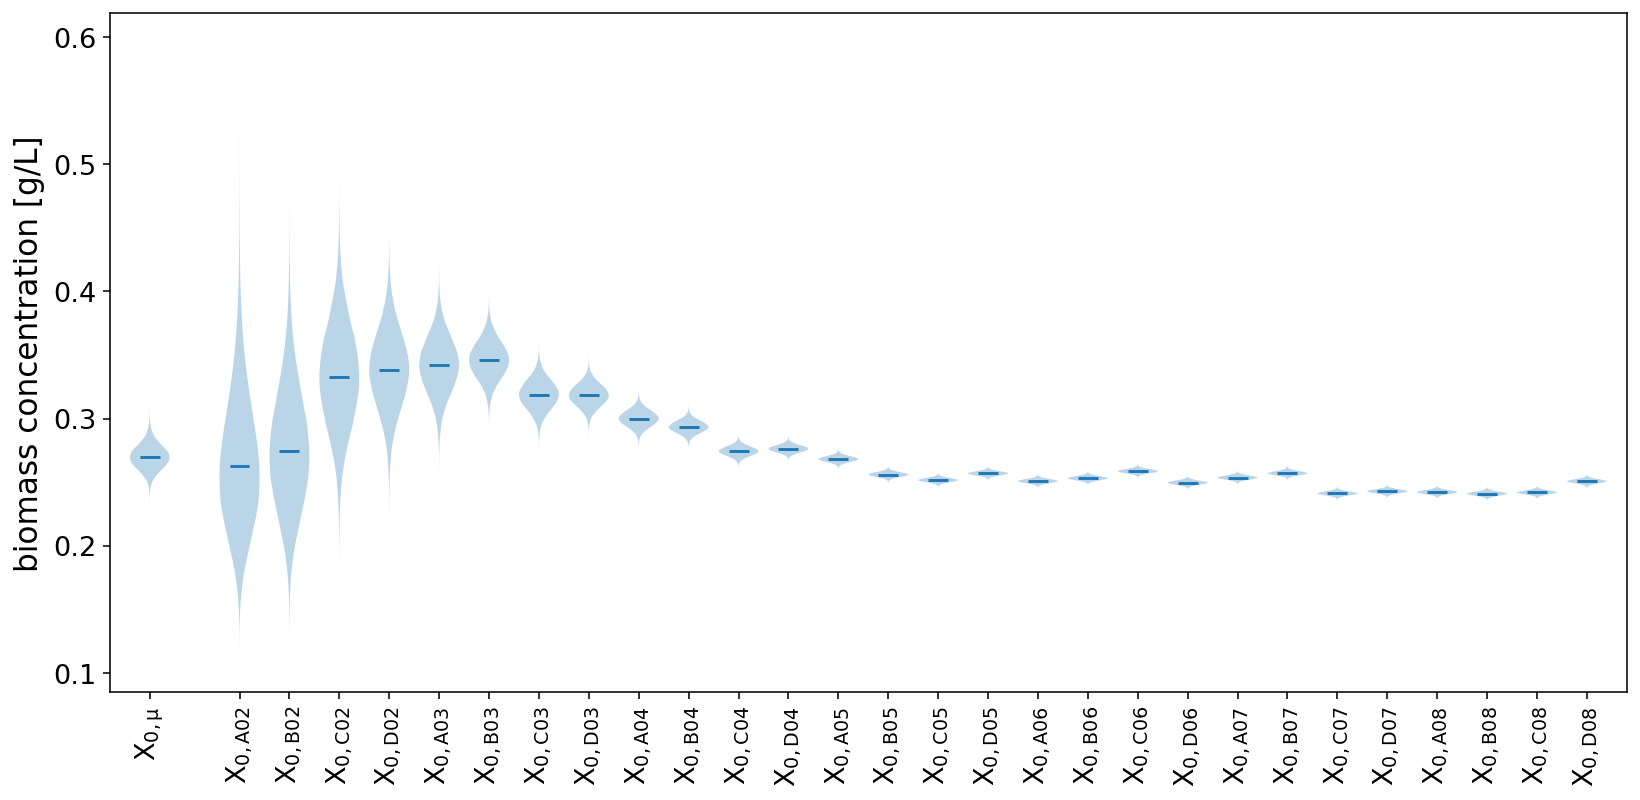

In [6]:
fig, axs = pyplot.subplots(
    dpi=140,
    figsize=(12, 6),
)

ax = axs
ax.violinplot(
    positions=positions,
    dataset=samples,
    showextrema=False,
    showmedians=True,
    widths=0.8,
)
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("biomass concentration [g/L]")
ax.set_xlim(numpy.min(positions) - 0.8, numpy.max(positions) + 0.8)

fig.tight_layout()
plotting.savefig(fig, "4.2.4 Hierarchical X0 analysis")
pyplot.show()

In [7]:
%load_ext watermark
%watermark

Last updated: 2021-12-16T00:02:55.858005+01:00

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.24.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 6
Architecture: 64bit

